~~~
Copyright 2025 Google LLC

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.
~~~

# Classifying sounds with HeAR and Wiki Commons Cough Data

<table><tbody><tr>
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/google-health/hear/blob/master/notebooks/train_data_efficient_classifier.ipynb">
      <img alt="Google Colab logo" src="https://www.tensorflow.org/images/colab_logo_32px.png" width="32px"><br> Run in Google Colab
    </a>
  </td>  
  <td style="text-align: center">
    <a href="https://github.com/google-health/hear/blob/master/notebooks/train_data_efficient_classifier.ipynb">
      <img alt="GitHub logo" src="https://github.githubassets.com/assets/GitHub-Mark-ea2971cee799.png" width="32px"><br> View on GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://huggingface.co/google/hear">
      <img alt="Hugging Face logo" src="https://huggingface.co/front/assets/huggingface_logo-noborder.svg" width="32px"><br> View on Hugging Face
    </a>
  </td>
</tr></tbody></table>


This Colab notebook demonstrates how to use the HeAR (Health Acoustic Representations) model, directly from Hugging Face, to create and utilize embeddings from health-related audio. The notebook focuses on building a data-efficient cough classifier system using a small [Wikimedia Commons](https://commons.wikimedia.org/wiki/Commons:Welcome) dataset of relevant sounds.

Embeddings are compact, numerical representations of audio data that capture important features, making them suitable for training machine learning models with limited data and computational resources. Learn more about embeddings and their benefits at [this page](https://developers.google.com/health-ai-developer-foundations/hear).

#### Here's a breakdown of the notebook's steps:

1.  **Model Loading:** The HeAR model is loaded from the Hugging Face Hub (requires authentication with your Hugging Face account).

2.  **Dataset Creation:**
    *   **Wikimedia Commons Audio:** A small set of audio files is downloaded from Wikimedia Commons. This dataset includes examples of coughing, as well as other sounds like sneezing, breathing, laughter, and door knocking. The files are all publicly available under various Creative Commons licenses (details are available on Wikimedia Commons).
    *   **Microphone Recording:** The notebook provides functionality to record audio directly within Colab using your microphone. This allows you to add your own recordings to the dataset.

3.  **Embedding Generation:**
    *   **Preprocessing:** The downloaded and recorded audio files are loaded and processed using `librosa`. They are resampled to 16kHz (required by the HeAR model) and segmented into 2-second clips.
    *   **Inference:** The preprocessed 2-second audio clips are fed to the HeAR model to generate embeddings. Each clip produces a 512-dimensional HeAR embedding vector.
    *   **Visualization (Optional):** The notebook includes functions to display the audio waveform, Mel spectrogram, and an audio player for each file and its individual clips.

4.  **Classifier Training:**
    *   **Labeling:** A set of labels is manually created, associating each audio file with whether it contains a cough or not. For example, `Cough_1.ogg` is labeled as `True`, while `Laughter.ogg` is labeled as `False`.
    *   **Model Selection:** Several scikit-learn classifiers are used and can easily be expanded, including:
        *   Support Vector Machine (linear kernel)
        *   Logistic Regression
        *   Gradient Boosting
        *   Random Forest
        *   Multi-layer Perceptron (MLP)
    *   **Training:** Each classifier is trained using the generated HeAR embeddings and the corresponding cough labels. This demonstrates the data efficiency of using embeddings – these models train quickly with very little data.

5.  **Cough Classification:**
    *   **Test on New Example:** Test the classfier on held out cough or non-cough sound examples.
    *   **Test on New Recording:** The microphone recording function is used again to capture a new audio clip (presumably of the user coughing or not coughing).
    *   **Prediction:** The new clip is preprocessed, its embedding is generated using the HeAR model, and then each of the trained classifiers is used to predict whether the clip contains a cough.

6.  **Embedding Visualization:**
    *   **PCA Plot:** A plot visualizing the data points in a PCA space is presented to show how similar sounds are grouped together, as they have similar embeddings.
    *   **Barcode Visualization:** The embeddings are visualized as "barcodes". Each embedding is displayed as a row in a heatmap, showing the magnitude of each dimension after subtracting the global mean. This provides a visual representation of the embedding's structure.


## Authenticate with HuggingFace, skip if you have a HF_TOKEN secret

In [1]:
from huggingface_hub.utils import HfFolder

if HfFolder.get_token() is None:
    from huggingface_hub import notebook_login
    notebook_login()

## Setup HeAR Hugging Face Model

Note: This was originally taken from Google Colab, so now on M1 chip locally, might wanna do some sort of GPU instead of tensorflow

Looks like pip install tensorflow-macos tensorflow-metal is an idea, but that's a later issue

In [ ]:
## TODO: I'm not entirely sure what happened, seems like it ran some of this code to actually
## download the model, but wasn't able to complete it

## And thenI ran the code below to use the HeAR model, so going forward to fix it and have
## only one cell working, I'm not entirely sure how we'll do that

In [2]:
from huggingface_hub import from_pretrained_keras

# Load the model directly from Hugging Face Hub
loaded_model = from_pretrained_keras("google/hear")
# Inference function for embedding generation
infer = loaded_model.signatures["serving_default"]

# HeAR Parameters
SAMPLE_RATE = 16000  # Samples per second (Hz)
CLIP_DURATION = 2    # Duration of the audio clip in seconds
CLIP_LENGTH = SAMPLE_RATE * CLIP_DURATION  # Total number of samples


Fetching 24 files:   0%|          | 0/24 [00:00<?, ?it/s]

event_detector/event_detector_large/save(…):   0%|          | 0.00/4.89M [00:00<?, ?B/s]

event_detector/event_detector_large/kera(…):   0%|          | 0.00/760k [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.82k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.24k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/11.9k [00:00<?, ?B/s]

event_detector/event_detector_large/vari(…):   0%|          | 0.00/12.2M [00:00<?, ?B/s]

.DS_Store:   0%|          | 0.00/6.15k [00:00<?, ?B/s]

event_detector/event_detector_large/fing(…):   0%|          | 0.00/79.0 [00:00<?, ?B/s]

event_detector/event_detector_small/fing(…):   0%|          | 0.00/76.0 [00:00<?, ?B/s]

variables.index:   0%|          | 0.00/5.08k [00:00<?, ?B/s]

event_detector/event_detector_small/kera(…):   0%|          | 0.00/644k [00:00<?, ?B/s]

event_detector/event_detector_small/save(…):   0%|          | 0.00/4.01M [00:00<?, ?B/s]

event_detector/event_detector_small/vari(…):   0%|          | 0.00/3.95M [00:00<?, ?B/s]

event_detector/spectrogram_frontend/fing(…):   0%|          | 0.00/55.0 [00:00<?, ?B/s]

variables.index:   0%|          | 0.00/4.21k [00:00<?, ?B/s]

event_detector/spectrogram_frontend/kera(…):   0%|          | 0.00/10.7k [00:00<?, ?B/s]

event_detector/spectrogram_frontend/save(…):   0%|          | 0.00/340k [00:00<?, ?B/s]

variables.data-00000-of-00001:   0%|          | 0.00/24.1k [00:00<?, ?B/s]

variables.index:   0%|          | 0.00/286 [00:00<?, ?B/s]

fingerprint.pb:   0%|          | 0.00/78.0 [00:00<?, ?B/s]

gitattributes:   0%|          | 0.00/1.59k [00:00<?, ?B/s]

variables/variables.data-00000-of-00001:   0%|          | 0.00/1.21G [00:00<?, ?B/s]

saved_model.pb:   0%|          | 0.00/3.98M [00:00<?, ?B/s]

variables.index:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

ValueError: File format not supported: filepath=/Users/hishambhatti/.cache/huggingface/hub/models--google--hear/snapshots/9b2eb2853c426676255cc6ac5804b7f1fe8e563f. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(/Users/hishambhatti/.cache/huggingface/hub/models--google--hear/snapshots/9b2eb2853c426676255cc6ac5804b7f1fe8e563f, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [12]:
import keras
import numpy as np

# Path to cached model (Hugging Face auto-downloads it)
model_path = "/Users/hishambhatti/.cache/huggingface/hub/models--google--hear/snapshots/9b2eb2853c426676255cc6ac5804b7f1fe8e563f"

# Load as a Keras layer wrapping the SavedModel
hear_layer = keras.layers.TFSMLayer(model_path, call_endpoint="serving_default")

# Example: prepare dummy audio input
SAMPLE_RATE = 16000
CLIP_DURATION = 2
CLIP_LENGTH = SAMPLE_RATE * CLIP_DURATION

dummy_audio = np.zeros((1, CLIP_LENGTH))  # batch of 1, 32000 samples

# Run inference
embeddings = hear_layer(dummy_audio)
print(embeddings)

2025-10-06 14:04:18.142646: I external/local_xla/xla/service/service.cc:163] XLA service 0x16b90b460 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-10-06 14:04:18.142688: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): Host, Default Version
I0000 00:00:1759784659.672143 19835482 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


{'output_0': <tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[  1.1726265 ,  -6.7566094 ,   5.3163095 ,  -3.9554539 ,
         -1.757076  ,  -4.255958  ,  -5.570771  ,  -2.9013546 ,
         -3.8126602 ,   1.624914  ,   1.518931  ,   5.954718  ,
         -2.9484284 ,   6.280806  ,   6.503013  ,   4.5953546 ,
         -0.9080836 ,  -2.8162997 ,  13.122832  ,  -8.804673  ,
          4.8481956 ,   2.533113  ,  -1.6121652 ,   6.7243857 ,
        -11.571278  ,  -2.8790016 ,   2.1489282 ,  -0.50289446,
         11.487478  ,  -8.143041  ,  -2.8054008 ,   0.7144324 ,
          3.3884482 ,   4.801947  ,   5.594465  ,   4.013277  ,
        -16.793953  ,   1.5528767 , -13.552591  ,   0.72892505,
         -2.8139846 ,  -0.0802537 ,  -1.9708534 , -17.059828  ,
         -2.9237034 ,  -3.6355598 ,  -5.5803556 ,  -7.025354  ,
        -20.260685  ,  -7.187771  ,  -0.4619028 ,  -3.4761837 ,
        -18.925413  ,  -6.8592114 ,   0.9054285 , -10.462153  ,
        -10.019852  ,  -6.9841447 , -16.8

In [78]:
# @title Test Model Inference on Random Input
# %%time
# import numpy as np

# # Generate Random Input Audio
# NUM_EXAMPLES = 4  # number of random audio examples to generate
# print(f"Generating {NUM_EXAMPLES} {CLIP_DURATION}s raw audio examples.")
# raw_audio = np.random.normal(size=(NUM_EXAMPLES, CLIP_LENGTH))
# print(f"Raw audio shape: {raw_audio.shape}, data type: {raw_audio.dtype}\n")

# # Perform Inference Extract and Process the Embedding
# print(f'Running HeAR model to produce {NUM_EXAMPLES} embeddings.')
# output_dict = infer(x=raw_audio)
# embedding = output_dict['output_0'].numpy()  # directly unpack as a NumPy array
# print(f"Embedding shape: {embedding.shape}, data type: {embedding.dtype}")

import numpy as np
import time

NUM_EXAMPLES = 4
print(f"Generating {NUM_EXAMPLES} {CLIP_DURATION}s raw audio examples.")
raw_audio = np.random.normal(size=(NUM_EXAMPLES, CLIP_LENGTH))
print(f"Raw audio shape: {raw_audio.shape}, dtype: {raw_audio.dtype}\n")

print(f'Running HeAR model to produce {NUM_EXAMPLES} embeddings.')
start = time.time()
embedding_dict = hear_layer(raw_audio)        # TFSMLayer inference
embedding_tensor = embedding_dict['output_0']
embedding_np = embedding_tensor.numpy()         # convert to NumPy
end = time.time()

print(f"Embedding shape: {embedding_np.shape}, dtype: {embedding_np.dtype}")
print("Elapsed:", end - start, "seconds")

Generating 4 2s raw audio examples.
Raw audio shape: (4, 32000), dtype: float64

Running HeAR model to produce 4 embeddings.
Embedding shape: (4, 512), dtype: float32
Elapsed: 4.233771085739136 seconds


## Download and Record Audio Data

 Wiki Commons
https://commons.wikimedia.org/wiki/Category:Coughing_audio


In [13]:
# # @title Download Public Domain Cough Examples to Notebook
# import os
# import subprocess
# from urllib.parse import urlparse

# # More examples: https://commons.wikimedia.org/wiki/Category:Coughing_audio
# wiki_cough_file_urls = [
#   'https://upload.wikimedia.org/wikipedia/commons/c/cc/Man_coughing.ogg',
#   'https://upload.wikimedia.org/wikipedia/commons/6/6a/Cough_1.ogg',
#   'https://upload.wikimedia.org/wikipedia/commons/d/d9/Cough_2.ogg', # hold out for test
#   'https://upload.wikimedia.org/wikipedia/commons/b/be/Woman_coughing_three_times.wav',
#   'https://upload.wikimedia.org/wikipedia/commons/d/d0/Sneezing.ogg',
#   'https://upload.wikimedia.org/wikipedia/commons/b/bc/Windy_breath.ogg',
#   'https://upload.wikimedia.org/wikipedia/commons/e/ef/Laughter_and_clearing_voice.ogg',
#   'https://upload.wikimedia.org/wikipedia/commons/c/c6/Laughter.ogg',
#   'https://upload.wikimedia.org/wikipedia/commons/1/1c/Knocking_on_wood_or_door.ogg',
# ]

# # Download the files.
# files_map = {}  # file name to file path map
# file_embeddings = {} # embedding cache
# for url in wiki_cough_file_urls:
#     filename = os.path.basename(urlparse(url).path)
#     print(f'Downloading {filename}...')
#     res = subprocess.run(['wget', '-nv', '-O', filename, url], capture_output=True, text=True)
#     if res.returncode != 0:
#         print(f"  Download failed. Return code: {res.returncode}\nError: {res.stderr}")
#     files_map[filename] = url
# print(f'\nLocal Files:\n{os.listdir():}\n')

import os
from urllib.parse import urlparse
import requests

wiki_cough_file_urls = [
    'https://upload.wikimedia.org/wikipedia/commons/c/cc/Man_coughing.ogg',
    'https://upload.wikimedia.org/wikipedia/commons/6/6a/Cough_1.ogg',
    'https://upload.wikimedia.org/wikipedia/commons/d/d9/Cough_2.ogg',  # hold out for test
    'https://upload.wikimedia.org/wikipedia/commons/b/be/Woman_coughing_three_times.wav',
    'https://upload.wikimedia.org/wikipedia/commons/d/d0/Sneezing.ogg',
    'https://upload.wikimedia.org/wikipedia/commons/b/bc/Windy_breath.ogg',
    'https://upload.wikimedia.org/wikipedia/commons/e/ef/Laughter_and_clearing_voice.ogg',
    'https://upload.wikimedia.org/wikipedia/commons/c/c6/Laughter.ogg',
    'https://upload.wikimedia.org/wikipedia/commons/1/1c/Knocking_on_wood_or_door.ogg',
]

files_map = {}
file_embeddings = {}

for url in wiki_cough_file_urls:
    filename = os.path.basename(urlparse(url).path)
    print(f'Downloading {filename}...')
    try:
        r = requests.get(url)
        r.raise_for_status()  # raise error if download failed
        with open(filename, 'wb') as f:
            f.write(r.content)
        print(f"  Saved {filename}")
        files_map[filename] = filename
    except Exception as e:
        print(f"  Download failed: {e}")

print(f'\nLocal Files:\n{os.listdir()}\n')


  Download failed: 403 Client Error: Forbidden for url: https://upload.wikimedia.org/wikipedia/commons/c/cc/Man_coughing.ogg
  Download failed: 403 Client Error: Forbidden for url: https://upload.wikimedia.org/wikipedia/commons/6/6a/Cough_1.ogg
  Download failed: 403 Client Error: Forbidden for url: https://upload.wikimedia.org/wikipedia/commons/d/d9/Cough_2.ogg
  Download failed: 403 Client Error: Forbidden for url: https://upload.wikimedia.org/wikipedia/commons/b/be/Woman_coughing_three_times.wav
  Download failed: 403 Client Error: Forbidden for url: https://upload.wikimedia.org/wikipedia/commons/d/d0/Sneezing.ogg
  Download failed: 403 Client Error: Forbidden for url: https://upload.wikimedia.org/wikipedia/commons/b/bc/Windy_breath.ogg
  Download failed: 403 Client Error: Forbidden for url: https://upload.wikimedia.org/wikipedia/commons/e/ef/Laughter_and_clearing_voice.ogg
  Download failed: 403 Client Error: Forbidden for url: https://upload.wikimedia.org/wikipedia/commons/c/c6/La

In [ ]:
# # @title Microphone Helpers
# from io import BytesIO
# from base64 import b64decode
# from google.colab import output
# from IPython.display import Javascript

# RECORD_JAVASCRIPT = """
# const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
# const b2text = blob => new Promise(resolve => {
#   const reader = new FileReader()
#   reader.onloadend = e => resolve(e.srcElement.result)
#   reader.readAsDataURL(blob)
# })
# var record = time => new Promise(async resolve => {
#   stream = await navigator.mediaDevices.getUserMedia({ audio: true })
#   recorder = new MediaRecorder(stream)
#   chunks = []
#   recorder.ondataavailable = e => chunks.push(e.data)
#   recorder.start()
#   await sleep(time)
#   recorder.onstop = async ()=>{
#     blob = new Blob(chunks)
#     text = await b2text(blob)
#     resolve(text)
#   }
#   recorder.stop()
# })
# """
# def record_microphone_and_save(duration_seconds=2, filename="output_audio", extension='.webm'):
#   output_filename = filename + extension
#   print(f"\nRecording for {duration_seconds} seconds...")
#   display(Javascript(RECORD_JAVASCRIPT))
#   base64_audio = output.eval_js('record(%d)' % (duration_seconds * 1000))
#   print("Done Recording!")
#   audio_bytes = b64decode(base64_audio.split(',')[1])

#   # Save the audio to a file
#   with open(output_filename, 'wb') as file:
#       file.write(audio_bytes)
#   print(f"Audio saved as {output_filename}")
#   return output_filename

In [ ]:
# @title Record your own file

# recording_name = "my_recording" # will overwrite existing
# recording_file = record_microphone_and_save(duration_seconds=CLIP_DURATION, filename=recording_name)
# files_map[recording_file] = recording_name # add to file map from above


## Model Inference

In [79]:
# @title Plot Helpers
import os
import librosa
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import matplotlib.cm as cm
import warnings

# Suppress the specific warning
warnings.filterwarnings("ignore", category=UserWarning, module="soundfile")
warnings.filterwarnings("ignore", module="librosa")


def plot_waveform(sound, sr, title, figsize=(12, 4), color='blue', alpha=0.7):
  """Plots the waveform of the audio using librosa.display."""
  plt.figure(figsize=figsize)
  librosa.display.waveshow(sound, sr=sr, color=color, alpha=alpha)
  plt.title(f"{title}\nshape={sound.shape}, sr={sr}, dtype={sound.dtype}")
  plt.xlabel("Time (s)")
  plt.ylabel("Amplitude")
  plt.grid(True)
  plt.tight_layout()
  plt.show()


def plot_spectrogram(sound, sr, title, figsize=(12, 4), n_fft=2048, hop_length=256, n_mels=128, cmap='nipy_spectral'):
  """Plots the Mel spectrogram of the audio using librosa."""
  plt.figure(figsize=figsize)
  mel_spectrogram = librosa.feature.melspectrogram(y=sound, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
  log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
  librosa.display.specshow(log_mel_spectrogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', cmap=cmap)
  plt.title(f"{title} - Mel Spectrogram")
  plt.tight_layout()
  plt.show()


In [80]:
# Build metadata dictionary
import csv

metadata_dict = {}

with open('vs_release_16k/meta/all_meta.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        key = row[0]                     # first column, e.g., 'm0023'
        value = ", ".join([col.strip().capitalize() if i==0 else col.strip()
                           for i, col in enumerate(row[1:])])
        metadata_dict[key] = value

# Example lookup
print(metadata_dict['f0003'])

Female, 56, United States of America, EN, no


In [81]:
file_embeddings = {}

In [ ]:
# @title Load Audio and Generate HeAR Embeddings

# Let's just try to do the audio for ONE of the downloaded audio embeddings
# Let's say f0003_0_cough.wav

# Audio display options
SHOW_WAVEFORM = False
SHOW_SPECTROGRAM = True
SHOW_PLAYER = True
SHOW_CLIPS = False

# Clips of length CLIP_DURATION seconds are extracted from the audio file
# using a sliding window. Adjecent clips are overlapped by CLIP_OVERLAP_PERCENT.
CLIP_OVERLAP_PERCENT = 10

# When True, if a clip extracted from the file is quieter than
# the SILENCE_RMS_THRESHOLD_DB it is not sent to the HeAR model.
CLIP_IGNORE_SILENT_CLIPS = True
# Maximum average amplitude of a frame to be considered silence.
SILENCE_RMS_THRESHOLD_DB = -50

file_set = {'f0003_0_cough', 'f0003_0_laughter', 'f0003_0_sigh', 'f0003_0_sneeze',
            'f0003_0_sniff', 'f0003_0_throatclearing', 'm1411_0_cough',
            'm1411_0_laughter', 'm1411_0_sigh', 'm1411_0_sneeze', 'm1411_0_sniff',
            'm1411_0_throatclearing'}

#files_map = {file: f'vs_release_16k/audio_16k/{file}.wav' for file in file_set}

#keys = {file[:5] for file in file_set}
#print(keys)

#print(files_map)

# files_map = {
#   'f0003_0_cough': 'vs_release_16k/audio_16k/f0003_0_cough.wav',
#   'f0003_0_laughter': 'vs_release_16k/audio_16k/f0003_0_laughter.wav',
#   'f0003_0_sigh.wav': 'vs_release_16k/audio_16k/f0003_0_sigh.wav',
#   'f0003_0_sneeze.wav': 'vs_release_16k/audio_16k/f0003_0_sneeze.wav',
#   'f0003_0_sniff.wav': 'vs_release_16k/audio_16k/f0003_0_sniff.wav',
#   'f0003_0_throatclearing.wav': 'vs_release_16k/audio_16k/f0003_0_throatclearing.wav',
#   'm1411_0_cough.wav': 'vs_release_16k/audio_16k/m1411_0_cough.wav',
#   'm1411_0_laughter.wav': 'vs_release_16k/audio_16k/m1411_0_laughter.wav',
#   'm1411_0_sigh.wav': 'vs_release_16k/audio_16k/m1411_0_sigh.wav',
#   'm1411_0_sneeze.wav': 'vs_release_16k/audio_16k/m1411_0_sneeze.wav',
#   'm1411_0_sniff.wav': 'vs_release_16k/audio_16k/m1411_0_sniff.wav',
#   'm1411_0_throatclearing.wav': 'vs_release_16k/audio_16k/m1411_0_throatclearing.wav'
# }

for file in file_set:
  file_url = f'vs_release_16k/audio_16k/{file}.wav'
  # Load the audio file into numpy array with specified sample rate and 1 channel (mono).
  print(f"\nLoading file: {file} from {file_url}")
  audio, sample_rate = librosa.load(file_url, sr=SAMPLE_RATE, mono=True)

  # Display audio file (optional)
  if SHOW_WAVEFORM:
    plot_waveform(audio, sample_rate, title=file, color='blue')
  if SHOW_SPECTROGRAM:
    plot_spectrogram(audio, sample_rate, file,  n_fft=2*1024, hop_length=64, n_mels=256, cmap='Blues')
  if SHOW_PLAYER:
    display(Audio(data=audio, rate=sample_rate))

  # This code segments an audio array into overlapping clips.
  # It calculates the number of clips, iterates through them,
  # and handles potential padding with zeros for the last clip if needed.
  clip_batch = []
  overlap_samples = int(CLIP_LENGTH * (CLIP_OVERLAP_PERCENT / 100))
  step_size = CLIP_LENGTH - overlap_samples
  num_clips = max(1, (len(audio) - overlap_samples) // step_size)
  print(f" Segmenting into {num_clips} {CLIP_DURATION}s clips")
  for i in range(num_clips):
    start_sample = i * step_size
    end_sample = start_sample + CLIP_LENGTH
    clip = audio[start_sample:end_sample]
    # Pad clip with zeros if less than the required CLIP_LENGTH.
    if end_sample > len(audio):
        print("  Last clip: Padding with zeros.")
        clip = np.pad(clip, (0, CLIP_LENGTH - len(clip)), 'constant')
    # Average Loudness of the clip(in dB)
    rms_loudness =  round(20 * np.log10(np.sqrt(np.mean(clip**2))))

    # Display clip info (optional)
    clip_str = f"Clip {i+1} from {file} [loudness: {rms_loudness} dB]"
    print(f"  {clip_str}")
    if SHOW_CLIPS:
      if SHOW_WAVEFORM:
        plot_waveform(clip, sample_rate, title=clip_str, figsize=(8, 3), color=cm.rainbow(i /num_clips))
      if SHOW_PLAYER:
        display(Audio(data=clip, rate=sample_rate))

    # Skip if clip is too quiet
    if CLIP_IGNORE_SILENT_CLIPS and rms_loudness < SILENCE_RMS_THRESHOLD_DB:
      print(f"  Clip {i+1} Skip...too quiet [loudness: {rms_loudness} dB]")
      continue

    # Add clip to batch
    clip_batch.append(clip)


  # Perform HeAR Batch inference to extract the associated clip embedding.
  # Only run inference if embedding not already in file_embedding cache.
  clip_batch = np.asarray(clip_batch)
  if file not in file_embeddings:
    print("  Clip not in cache, performing inference...")

    start = time.time()
    embedding_batch = hear_layer(clip_batch)['output_0'].numpy()
    #embedding_batch = infer(x=clip_batch)['output_0'].numpy()
    end = time.time()
    print("Elapsed:", end - start, "seconds")
    file_embeddings[file] = embedding_batch
  else:
    embedding_batch = file_embeddings[file]
  print(f"  Embedding batch shape: {embedding_batch.shape}, data type: {embedding_batch.dtype}")




Loading file: m1411_0_sigh from vs_release_16k/audio_16k/m1411_0_sigh.wav


NameError: name 'librosa' is not defined

In [ ]:
# # @title Load Audio and Generate HeAR Embeddings
# %%time

# # Audio display options
# SHOW_WAVEFORM = False
# SHOW_SPECTROGRAM = True
# SHOW_PLAYER = True
# SHOW_CLIPS = False

# # Clips of length CLIP_DURATION seconds are extracted from the audio file
# # using a sliding window. Adjecent clips are overlapped by CLIP_OVERLAP_PERCENT.
# CLIP_OVERLAP_PERCENT = 10

# # When True, if a clip extracted from the file is quieter than
# # the SILENCE_RMS_THRESHOLD_DB it is not sent to the HeAR model.
# CLIP_IGNORE_SILENT_CLIPS = True
# # Maximum average amplitude of a frame to be considered silence.
# SILENCE_RMS_THRESHOLD_DB = -50


# for file_key, file_url in files_map.items():
#   # Load the audio file into numpy array with specified sample rate and 1 channel (mono).
#   print(f"\nLoading file: {file_key} from {file_url}")
#   audio, sample_rate = librosa.load(file_key, sr=SAMPLE_RATE, mono=True)

#   # Display audio file (optional)
#   if SHOW_WAVEFORM:
#     plot_waveform(audio, sample_rate, title=file_key, color='blue')
#   if SHOW_SPECTROGRAM:
#     plot_spectrogram(audio, sample_rate, file_key,  n_fft=2*1024, hop_length=64, n_mels=256, cmap='Blues')
#   if SHOW_PLAYER:
#     display(Audio(data=audio, rate=sample_rate))

#   # This code segments an audio array into overlapping clips.
#   # It calculates the number of clips, iterates through them,
#   # and handles potential padding with zeros for the last clip if needed.
#   clip_batch = []
#   overlap_samples = int(CLIP_LENGTH * (CLIP_OVERLAP_PERCENT / 100))
#   step_size = CLIP_LENGTH - overlap_samples
#   num_clips = max(1, (len(audio) - overlap_samples) // step_size)
#   print(f" Segmenting into {num_clips} {CLIP_DURATION}s clips")
#   for i in range(num_clips):
#     start_sample = i * step_size
#     end_sample = start_sample + CLIP_LENGTH
#     clip = audio[start_sample:end_sample]
#     # Pad clip with zeros if less than the required CLIP_LENGTH.
#     if end_sample > len(audio):
#         print("  Last clip: Padding with zeros.")
#         clip = np.pad(clip, (0, CLIP_LENGTH - len(clip)), 'constant')
#     # Average Loudness of the clip(in dB)
#     rms_loudness =  round(20 * np.log10(np.sqrt(np.mean(clip**2))))

#     # Display clip info (optional)
#     clip_str = f"Clip {i+1} from {file_key} [loudness: {rms_loudness} dB]"
#     print(f"  {clip_str}")
#     if SHOW_CLIPS:
#       if SHOW_WAVEFORM:
#         plot_waveform(clip, sample_rate, title=clip_str, figsize=(8, 3), color=cm.rainbow(i /num_clips))
#       if SHOW_PLAYER:
#         display(Audio(data=clip, rate=sample_rate))

#     # Skip if clip is too quiet
#     if CLIP_IGNORE_SILENT_CLIPS and rms_loudness < SILENCE_RMS_THRESHOLD_DB:
#       print(f"  Clip {i+1} Skip...too quiet [loudness: {rms_loudness} dB]")
#       continue

#     # Add clip to batch
#     clip_batch.append(clip)


#   # Perform HeAR Batch inference to extract the associated clip embedding.
#   # Only run inference if embedding not already in file_embedding cache.
#   clip_batch = np.asarray(clip_batch)
#   if file_key not in file_embeddings:
#     print("  Clip not in cache, performing inference...")
#     embedding_batch = infer(x=clip_batch)['output_0'].numpy()
#     file_embeddings[file_key] = embedding_batch
#   else:
#     embedding_batch = file_embeddings[file_key]
#   print(f"  Embedding batch shape: {embedding_batch.shape}, data type: {embedding_batch.dtype}")


In [83]:
# # @title Collect Embeddings, Create Training Set

# # Hold out example for testing with cough classifier later.
# # Only using one test file for now, can also record your own.
# # Note: `Cough_2.ogg` is likely the same person as `Cough_1.ogg`,
# #  so we expect it to produce a similar embedding
# test_file = 'Cough_2.ogg'
# assert test_file in files_map, f"Test file '{test_file}' not found in files_map."


# # Combine train embeddings and hold out test embeddings.
# test_embeddings, test_file_names = [], [] # held out
# train_embeddings, train_file_names = [], []
# for file_key, embedding_batch in file_embeddings.items():
#   for embedding in embedding_batch:
#     if file_key == test_file:
#       test_embeddings.append(embedding)
#       test_file_names.append(file_key)
#     else:
#       train_embeddings.append(embedding)
#       train_file_names.append(file_key)
# train_embeddings = np.array(train_embeddings)
# train_file_set = set(train_file_names)
# test_file_set = set(test_file_names)

# print(f"Train embeddings have shape: {train_embeddings.shape}, data type: {train_embeddings.dtype}")
# print(f"Train Embeddings are from {len(train_file_set)} unique files:{train_file_set}")
# print(f"Test Embeddings are from {len(test_file_set)} unique files:{test_file_set}")


embeddings, file_names = [], [] # held out
for file, embedding_batch in file_embeddings.items():
  for embedding in embedding_batch:
      embeddings.append(embedding)
      file_names.append(file)
embeddings = np.array(embeddings)

print(f"Embeddings have shape: {embeddings.shape}, data type: {embeddings.dtype}")
print(f"Embeddings are from {len(file_set)} unique files:{file_set}")

Embeddings have shape: (20, 512), data type: float32
Embeddings are from 12 unique files:{'f0003_0_sniff', 'm1411_0_sniff', 'f0003_0_cough', 'm1411_0_cough', 'f0003_0_sigh', 'f0003_0_throatclearing', 'm1411_0_laughter', 'm1411_0_sigh', 'm1411_0_throatclearing', 'm1411_0_sneeze', 'f0003_0_laughter', 'f0003_0_sneeze'}


## Use Embeddings

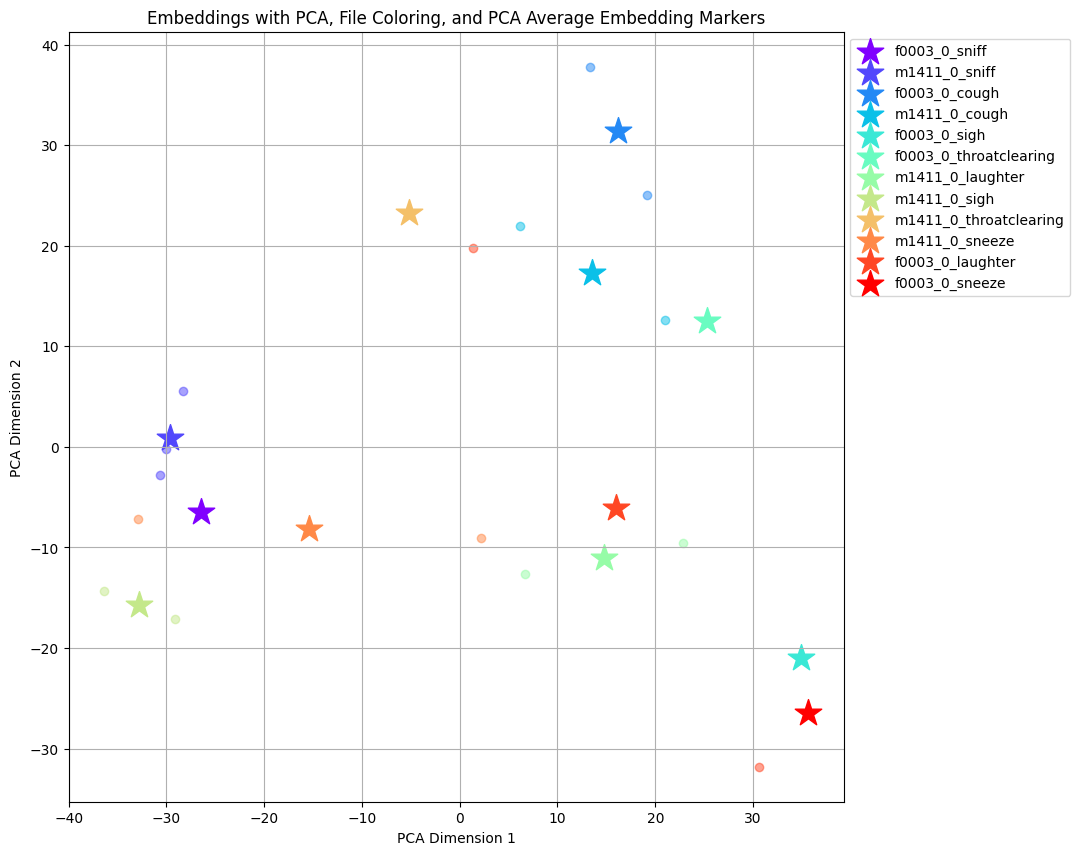

In [84]:
# # @title Plot Train Embeddings, show average Embedding per file
# from sklearn.decomposition import PCA

# # Fit PCA
# pca = PCA(n_components=2)
# pca_embeddings = pca.fit_transform(train_embeddings)

# # Calculate average embedding per file after PCA, mark as star
# avg_embeddings_per_file_pca = {}
# for file_key in train_file_set:
#     file_indices = [i for i, key in enumerate(train_file_names) if key == file_key]
#     avg_embeddings_per_file_pca[file_key] = np.mean(pca_embeddings[file_indices], axis=0)

# # Plot with coloring and average embedding
# plt.figure(figsize=(10, 10))
# colors = cm.rainbow(np.linspace(0, 1, len(train_file_set)))
# color_map = {key: colors[i] for i, key in enumerate(train_file_set)}
# for i, embedding in enumerate(pca_embeddings):
#     file_key = train_file_names[i]
#     plt.scatter(embedding[0], embedding[1], color=color_map[file_key], alpha=0.5)  # No label for each dot

# # Add average embeddings as star markers (using PCA averages)
# for file_key, avg_embedding in avg_embeddings_per_file_pca.items():
#     plt.scatter(avg_embedding[0], avg_embedding[1], marker='*', color=color_map[file_key], label=file_key, s=400)  # Label for average

# plt.xlabel("PCA Dimension 1")
# plt.ylabel("PCA Dimension 2")
# plt.title("Embeddings with PCA, File Coloring, and PCA Average Embedding Markers")
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.grid(True)
# plt.show()

# @title Plot Train Embeddings, show average Embedding per file

# NOTE: This one doesn't do the metadata
from sklearn.decomposition import PCA

# Fit PCA
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(embeddings)

# Calculate average embedding per file after PCA, mark as star
avg_embeddings_per_file_pca = {}
for file in file_set:
    file_indices = [i for i, key in enumerate(file_names) if key == file]
    avg_embeddings_per_file_pca[file] = np.mean(pca_embeddings[file_indices], axis=0)

# Plot with coloring and average embedding
plt.figure(figsize=(10, 10))
colors = cm.rainbow(np.linspace(0, 1, len(file_set)))
color_map = {key: colors[i] for i, key in enumerate(file_set)}
for i, embedding in enumerate(pca_embeddings):
    file_key = file_names[i]
    plt.scatter(embedding[0], embedding[1], color=color_map[file_key], alpha=0.5)  # No label for each dot

# Add average embeddings as star markers (using PCA averages)
for file_key, avg_embedding in avg_embeddings_per_file_pca.items():
    plt.scatter(avg_embedding[0], avg_embedding[1], marker='*', color=color_map[file_key], label=file_key, s=400)  # Label for average

plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title("Embeddings with PCA, File Coloring, and PCA Average Embedding Markers")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

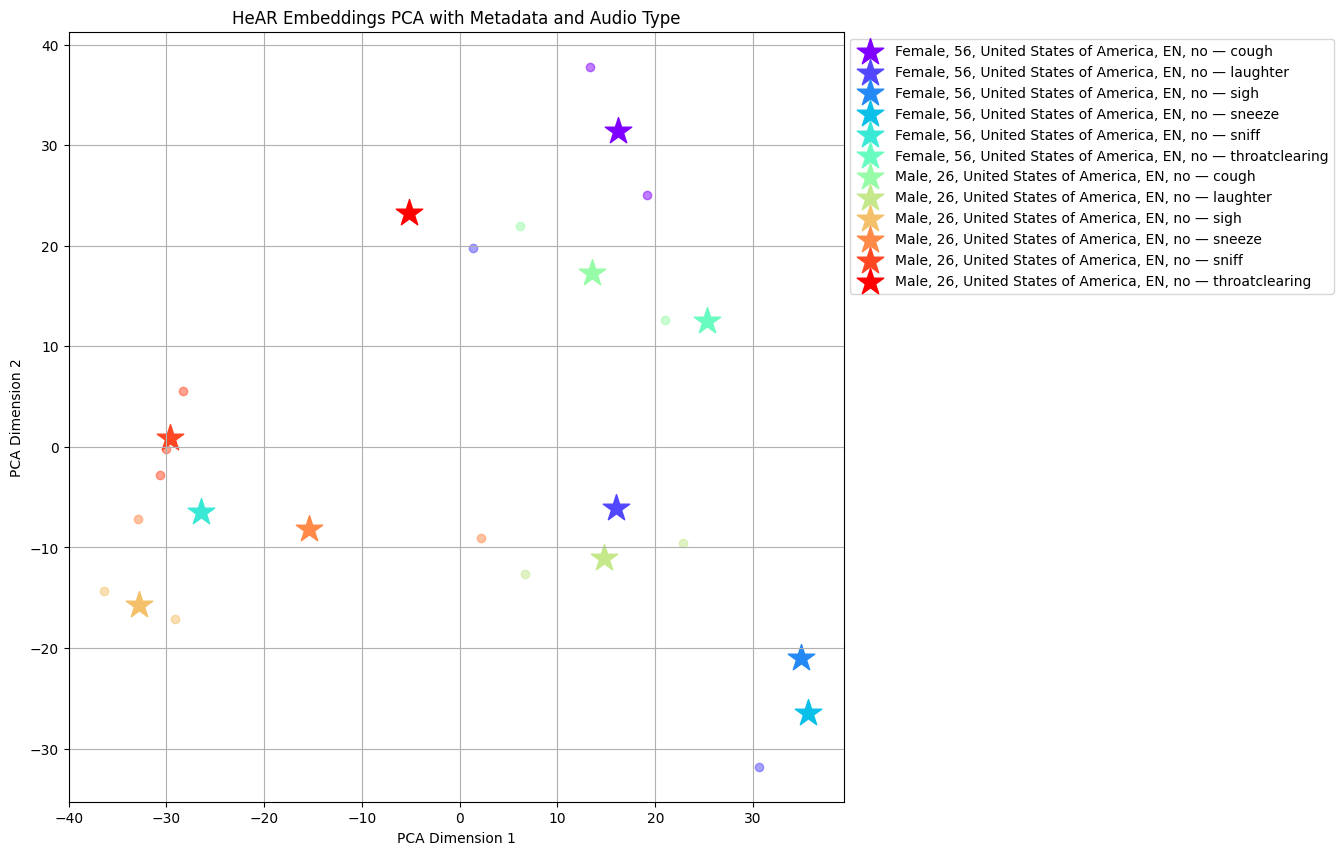

In [85]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# --- Step 1: Fit PCA ---
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(embeddings)

# --- Step 2: Helper to parse example ID and audio type from file path ---
def parse_file_info(file_path):
    # file_path: 'vs_release_16k/audio_16k/f0003_0_cough.wav'
    base_name = file_path.split('/')[-1]           # 'f0003_0_cough.wav'
    parts = base_name.split('_')                   # ['f0003', '0', 'cough.wav']
    id = parts[0]                          # 'f0003'
    audio_type = parts[2].replace('.wav', '')      # 'cough'
    return id, audio_type

# --- Step 3: Build human-readable labels for each embedding ---
file_labels = []
for file_path in file_names:
    id, audio_type = parse_file_info(file_path)
    metadata = metadata_dict.get(id, "Unknown")
    file_labels.append(f"{metadata} — {audio_type}")

# --- Step 4: Prepare color mapping ---
unique_files = sorted(set(file_names))           # use full paths to match file_names
colors = cm.rainbow(np.linspace(0, 1, len(unique_files)))
color_map = {key: colors[i] for i, key in enumerate(unique_files)}

# --- Step 5: Calculate average embedding per file ---
avg_embeddings_per_file_pca = {}
for file in unique_files:
    indices = [i for i, f in enumerate(file_names) if f == file]
    avg_embeddings_per_file_pca[file] = np.mean(pca_embeddings[indices], axis=0)

# --- Step 6: Plot all embeddings ---
plt.figure(figsize=(10, 10))

# Scatter individual embeddings
for i, embedding in enumerate(pca_embeddings):
    plt.scatter(embedding[0], embedding[1], color=color_map[file_names[i]], alpha=0.5)

# Scatter average embeddings as stars
for file in unique_files:
    avg_emb = avg_embeddings_per_file_pca[file]
    plt.scatter(avg_emb[0], avg_emb[1], marker='*', color=color_map[file], s=400,
                label=file_labels[file_names.index(file)])  # use first label of that file

plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title("HeAR Embeddings PCA with Metadata and Audio Type")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()



END of my experiment with this

TODO: We can run this test with by doing some sort of train-test split, but that's not really the
point of this notebook


In [ ]:
# @title Run embedding extraction process on ALL files in VocalSound

# # Audio display options
# SHOW_WAVEFORM = False
# SHOW_SPECTROGRAM = False
# SHOW_PLAYER = False
# SHOW_CLIPS = False

# # Clips of length CLIP_DURATION seconds are extracted from the audio file
# # using a sliding window. Adjecent clips are overlapped by CLIP_OVERLAP_PERCENT.
# CLIP_OVERLAP_PERCENT = 10

# # When True, if a clip extracted from the file is quieter than
# # the SILENCE_RMS_THRESHOLD_DB it is not sent to the HeAR model.
# CLIP_IGNORE_SILENT_CLIPS = True
# # Maximum average amplitude of a frame to be considered silence.
# SILENCE_RMS_THRESHOLD_DB = -50

# file_set = {'f0003_0_cough', 'f0003_0_laughter', 'f0003_0_sigh', 'f0003_0_sneeze',
#             'f0003_0_sniff', 'f0003_0_throatclearing', 'm1411_0_cough',
#             'm1411_0_laughter', 'm1411_0_sigh', 'm1411_0_sneeze', 'm1411_0_sniff',
#             'm1411_0_throatclearing'}

# for file in file_set:
#   file_url = f'vs_release_16k/audio_16k/{file}.wav'
#   # Load the audio file into numpy array with specified sample rate and 1 channel (mono).
#   print(f"\nLoading file: {file} from {file_url}")
#   audio, sample_rate = librosa.load(file_url, sr=SAMPLE_RATE, mono=True)

#   # Display audio file (optional)
#   if SHOW_WAVEFORM:
#     plot_waveform(audio, sample_rate, title=file, color='blue')
#   if SHOW_SPECTROGRAM:
#     plot_spectrogram(audio, sample_rate, file,  n_fft=2*1024, hop_length=64, n_mels=256, cmap='Blues')
#   if SHOW_PLAYER:
#     display(Audio(data=audio, rate=sample_rate))

#   # This code segments an audio array into overlapping clips.
#   # It calculates the number of clips, iterates through them,
#   # and handles potential padding with zeros for the last clip if needed.
#   clip_batch = []
#   overlap_samples = int(CLIP_LENGTH * (CLIP_OVERLAP_PERCENT / 100))
#   step_size = CLIP_LENGTH - overlap_samples
#   num_clips = max(1, (len(audio) - overlap_samples) // step_size)
#   print(f" Segmenting into {num_clips} {CLIP_DURATION}s clips")
#   for i in range(num_clips):
#     start_sample = i * step_size
#     end_sample = start_sample + CLIP_LENGTH
#     clip = audio[start_sample:end_sample]
#     # Pad clip with zeros if less than the required CLIP_LENGTH.
#     if end_sample > len(audio):
#         print("  Last clip: Padding with zeros.")
#         clip = np.pad(clip, (0, CLIP_LENGTH - len(clip)), 'constant')
#     # Average Loudness of the clip(in dB)
#     rms_loudness =  round(20 * np.log10(np.sqrt(np.mean(clip**2))))

#     # Display clip info (optional)
#     clip_str = f"Clip {i+1} from {file} [loudness: {rms_loudness} dB]"
#     print(f"  {clip_str}")
#     if SHOW_CLIPS:
#       if SHOW_WAVEFORM:
#         plot_waveform(clip, sample_rate, title=clip_str, figsize=(8, 3), color=cm.rainbow(i /num_clips))
#       if SHOW_PLAYER:
#         display(Audio(data=clip, rate=sample_rate))

#     # Skip if clip is too quiet
#     if CLIP_IGNORE_SILENT_CLIPS and rms_loudness < SILENCE_RMS_THRESHOLD_DB:
#       print(f"  Clip {i+1} Skip...too quiet [loudness: {rms_loudness} dB]")
#       continue

#     # Add clip to batch
#     clip_batch.append(clip)


#   # Perform HeAR Batch inference to extract the associated clip embedding.
#   # Only run inference if embedding not already in file_embedding cache.
#   clip_batch = np.asarray(clip_batch)
#   if file not in file_embeddings:
#     print("  Clip not in cache, performing inference...")

#     start = time.time()
#     embedding_batch = hear_layer(clip_batch)['output_0'].numpy()
#     #embedding_batch = infer(x=clip_batch)['output_0'].numpy()
#     end = time.time()
#     print("Elapsed:", end - start, "seconds")
#     file_embeddings[file] = embedding_batch
#   else:
#     embedding_batch = file_embeddings[file]
#   print(f"  Embedding batch shape: {embedding_batch.shape}, data type: {embedding_batch.dtype}")


import os
import glob
import numpy as np
import pandas as pd
import librosa
import time
import csv
# Import other necessary libraries (hear_layer, SAMPLE_RATE, CLIP_DURATION, etc.)
# ... (Assuming hear_layer, SAMPLE_RATE, CLIP_LENGTH are defined globally)

# --- Configuration Constants (Assuming these are defined earlier) ---
# SAMPLE_RATE = 16000 # Example: must match HeAR model
# CLIP_DURATION = 2   # Example: must match HeAR model
# CLIP_LENGTH = SAMPLE_RATE * CLIP_DURATION

# Audio display options (kept for completeness, but disabled)
SHOW_WAVEFORM = False
SHOW_SPECTROGRAM = False
SHOW_PLAYER = False
SHOW_CLIPS = False

CLIP_OVERLAP_PERCENT = 10
CLIP_IGNORE_SILENT_CLIPS = True
SILENCE_RMS_THRESHOLD_DB = -50
# ------------------------------------------------------------------

# --- 1. Load and Process Metadata ---
METADATA_PATH = 'vs_release_16k/meta/all_meta.csv'

# Create a more structured metadata mapping, linking file prefix (e.g., 'f0003') to speaker attributes
metadata_map = {}
with open(METADATA_PATH, newline='') as csvfile:
    reader = csv.DictReader(csvfile, fieldnames=['id', 'gender', 'age', 'native_language', 'country', 'health'])
    # Skip the first row if it's a header or description you don't need
    # next(reader)
    for row in reader:
        # The key is the speaker ID (e.g., 'f0003', 'm1411')
        metadata_map[row['id']] = row

print(f"Loaded metadata for {len(metadata_map)} unique speakers.")

# --- 2. Find All Audio Files ---
AUDIO_DIR = 'vs_release_16k/audio_16k'
all_file_paths = glob.glob(os.path.join(AUDIO_DIR, '*.wav'))
print(f"Found {len(all_file_paths)} audio files in the dataset.")

# --- 3. Initialize Storage Arrays ---
all_embeddings = []
all_metadata_rows = []
embedding_dimension = 512

# print(all_file_paths) the long version, e.g. 'vs_release_16k/audio_16k/f1236_0_sigh.wav'

# --- 4. Processing Loop for ALL Files ---
start_total_time = time.time()
file_embeddings_cache = {} # Use this to avoid re-running inference on the same file in one session

for i, file_path in enumerate(all_file_paths):
    # Basename extracts the folders, e.g. vs_release_16k/audio_16k/f1236_0_sigh.wav --> f1236_0_sigh.wav
    base_file_name = os.path.basename(file_path).replace('.wav', '')
    # Example base_file_name: 'f0003_0_cough'

    # # NOTE: For some reason this audio is empty
    # missing_audio_files = {'f0098_0_sneeze', 'm0072_0_throatclearing'}

    # if base_file_name in missing_audio_files:
    #     continue

    # --- Parse File Info and Get Metadata ---
    try:
        parts = base_file_name.split('_')
        speaker_id = parts[0]
        sound_type = parts[-1] # 'cough', 'laughter', etc.
        speaker_metadata = metadata_map.get(speaker_id, {})
    except IndexError:
        print(f"Skipping malformed filename: {base_file_name}")
        continue

    if i % 1000 == 0:
        print(f"\nProcessing file {i}/{len(all_file_paths)}: {base_file_name}")

    # --- A. Load Audio ---
    try:
        audio, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE, mono=True)
    except Exception as e:
        print(f"  Error loading audio for {base_file_name}: {e}")
        continue

    # 1. Check if the audio array is completely empty
    if audio.size == 0:
        print(f"  Skipping {base_file_name}: Audio file is empty (size=0).")
        continue

    # 2. Check if the file is too short to even form one full clip
    # CLIP_LENGTH must be defined as SAMPLE_RATE * CLIP_DURATION (e.g., 16000 * 2 = 32000 samples)
    if len(audio) < CLIP_LENGTH:
        print(f"  Skipping {base_file_name}: Audio is too short ({len(audio)} samples) to create a {CLIP_DURATION}s clip.")
        continue

    # Display audio file (optional)
    if SHOW_WAVEFORM:
        plot_waveform(audio, sample_rate, title=file, color='blue')
    if SHOW_SPECTROGRAM:
        plot_spectrogram(audio, sample_rate, file,  n_fft=2*1024, hop_length=64, n_mels=256, cmap='Blues')
    if SHOW_PLAYER:
        display(Audio(data=audio, rate=sample_rate))

    # --- B. Segment into Clips and Filter Silence (Your Existing Logic) ---
    clip_batch = []
    overlap_samples = int(CLIP_LENGTH * (CLIP_OVERLAP_PERCENT / 100))
    step_size = CLIP_LENGTH - overlap_samples
    num_clips = max(1, (len(audio) - overlap_samples) // step_size)

    print(file_path)

    for j in range(num_clips):
        start_sample = j * step_size
        end_sample = start_sample + CLIP_LENGTH
        clip = audio[start_sample:end_sample]

        # Padding (if needed for the last clip)
        if end_sample > len(audio):
            clip = np.pad(clip, (0, CLIP_LENGTH - len(clip)), 'constant')

        # Silence Filtering
        mean_squared_amplitude = np.mean(clip**2)

        if mean_squared_amplitude == 0:
            # Handle entirely silent clips
            rms_loudness = SILENCE_RMS_THRESHOLD_DB - 10
        else:
            rms_loudness = round(20 * np.log10(np.sqrt(mean_squared_amplitude)))

        if SHOW_CLIPS:
            if SHOW_WAVEFORM:
                plot_waveform(clip, sample_rate, title=clip_str, figsize=(8, 3), color=cm.rainbow(i /num_clips))
            if SHOW_PLAYER:
                display(Audio(data=clip, rate=sample_rate))

        if CLIP_IGNORE_SILENT_CLIPS and rms_loudness < SILENCE_RMS_THRESHOLD_DB:
            continue

        clip_batch.append(clip)

    # Skip files with no valid/non-silent clips
    if not clip_batch:
        print(f"  Skipping {base_file_name}: No non-silent clips found.")
        continue

    # --- C. HeAR Inference (Batch) ---
    clip_batch = np.asarray(clip_batch)

    if base_file_name not in file_embeddings_cache:
        # print("  Performing batch inference...")

        ## THIS IS WHERE WE ACTUALLY RUN THE HEAR MODEL
        embedding_batch = hear_layer(clip_batch)['output_0'].numpy()
        file_embeddings_cache[base_file_name] = embedding_batch
    else:
        embedding_batch = file_embeddings_cache[base_file_name]

    # --- D. Calculate the MEAN Embedding (The key step for full-file representation) ---
    # Shape of embedding_batch is (num_clips, embedding_dimension)
    # The mean is taken across the clips (axis=0) to get one vector (embedding_dimension)
    mean_embedding = np.mean(embedding_batch, axis=0)
    all_embeddings.append(mean_embedding)

    # --- E. Store Metadata ---
    # Create a single dictionary row with all relevant information
    metadata_row = {
        'file_name': base_file_name,
        'sound_type': sound_type,
        'clip_count': len(clip_batch),
        'speaker_id': speaker_id,
        **speaker_metadata # Merge speaker-level metadata
    }
    all_metadata_rows.append(metadata_row)

end_total_time = time.time()
print("\n" + "="*50)
print(f"Total time for processing all files: {end_total_time - start_total_time:.2f} seconds.")
print(f"Successfully processed and embedded {len(all_embeddings)} files.")
print(f"Final Embeddings Array Shape: ({len(all_embeddings)}, {embedding_dimension})")
print("="*50)

# # --- 5. Finalize and Save to Disk ---

# Convert lists to final NumPy array and Pandas DataFrame
final_embeddings_np = np.array(all_embeddings)
final_metadata_df = pd.DataFrame(all_metadata_rows)

# Define file names for saving
EMBEDDINGS_FILE = 'vocalsound_hear_embeddings.npy'
METADATA_FILE = 'vocalsound_hear_metadata.csv'

# Save the large NumPy array (embeddings)
np.save(EMBEDDINGS_FILE, final_embeddings_np)
print(f"Saved embeddings to: {EMBEDDINGS_FILE}")

# Save the metadata (file_name, sound_type, speaker info)
final_metadata_df.to_csv(METADATA_FILE, index=False)
print(f"Saved metadata to: {METADATA_FILE}")

Loaded metadata for 3365 unique speakers.
Found 21024 audio files in the dataset.

Processing file 0/21024: f1236_0_sigh
vs_release_16k/audio_16k/f1236_0_sigh.wav
vs_release_16k/audio_16k/f1541_0_throatclearing.wav
vs_release_16k/audio_16k/m1679_0_sniff.wav
vs_release_16k/audio_16k/m1783_0_throatclearing.wav
vs_release_16k/audio_16k/f1291_0_laughter.wav
vs_release_16k/audio_16k/m0209_0_sneeze.wav
vs_release_16k/audio_16k/f1284_0_laughter.wav
vs_release_16k/audio_16k/m1037_0_sigh.wav
vs_release_16k/audio_16k/m0019_0_cough.wav
vs_release_16k/audio_16k/f2769_0_laughter.wav
vs_release_16k/audio_16k/m1329_0_sniff.wav
vs_release_16k/audio_16k/m2930_0_throatclearing.wav
vs_release_16k/audio_16k/f2769_0_sniff.wav
vs_release_16k/audio_16k/f1956_2_sneeze.wav
vs_release_16k/audio_16k/f0998_0_laughter.wav
vs_release_16k/audio_16k/m2523_0_laughter.wav
vs_release_16k/audio_16k/m2536_0_laughter.wav
vs_release_16k/audio_16k/f2899_0_sniff.wav
vs_release_16k/audio_16k/f1216_0_sneeze.wav
vs_release_16k/a

KeyboardInterrupt: 

In [15]:
# Load it all back
import numpy as np
import pandas as pd
import os

# --- Configuration for Loading ---
EMBEDDINGS_FILE = 'vocalsound_hear_embeddings.npy'
METADATA_FILE = 'vocalsound_hear_metadata.csv'

# --- 1. Load Embeddings ---
if os.path.exists(EMBEDDINGS_FILE):
    # Load the NumPy array containing the mean embeddings
    embeddings = np.load(EMBEDDINGS_FILE)
    print(f"Loaded embeddings. Shape: {embeddings.shape}")
else:
    print(f"Error: Embeddings file not found at {EMBEDDINGS_FILE}")
    # You might want to exit or raise an error here if the file is mandatory
    raise FileNotFoundError(f"Embeddings file not found: {EMBEDDINGS_FILE}")


# --- 2. Load Metadata ---
if os.path.exists(METADATA_FILE):
    # Load the CSV containing all the file and speaker metadata
    metadata_df = pd.read_csv(METADATA_FILE)
    print(f"Loaded metadata. Shape: {metadata_df.shape}")
else:
    print(f"Error: Metadata file not found at {METADATA_FILE}")
    raise FileNotFoundError(f"Metadata file not found: {METADATA_FILE}")

# Sanity Check: Ensure the number of embeddings matches the number of metadata rows
if embeddings.shape[0] != metadata_df.shape[0]:
    print(f"WARNING: Mismatch between embeddings ({embeddings.shape[0]}) and metadata ({metadata_df.shape[0]}) rows.")
    # Proceed, but note that this could indicate an issue in the processing step.

Loaded embeddings. Shape: (20237, 512)
Loaded metadata. Shape: (20237, 10)


In [16]:
print(len(embeddings))
print(len(metadata_df))

print(embeddings)
print(metadata_df)

20237
20237
[[-1.5076747  -0.05841772 -1.3659703  ...  7.5986466   1.5381771
   4.02949   ]
 [-2.3041425  -1.0534989  -0.29738647 ... 11.167413   -1.2127879
   5.8057303 ]
 [-0.745519   -3.5817745   2.9018955  ...  4.681165    0.7297609
   4.2159386 ]
 ...
 [-2.1963046   2.4304621  -3.8209593  ... 10.771981    1.687137
   6.463884  ]
 [-2.925953   -0.2207841   2.344604   ...  4.494924    5.045117
   5.30715   ]
 [-2.4463775   0.16982026  0.7550093  ...  8.677674    1.3125969
   6.467593  ]]
                    file_name      sound_type  clip_count speaker_id     id  \
0                f1236_0_sigh            sigh           1      f1236  f1236   
1      f1541_0_throatclearing  throatclearing           2      f1541  f1541   
2               m1679_0_sniff           sniff           1      m1679  m1679   
3      m1783_0_throatclearing  throatclearing           1      m1783  m1783   
4            f1291_0_laughter        laughter           1      f1291  f1291   
...                       ... 

Verify that embeddings were generated correctly (rows in metadata match corresponding rows in embedding)

In [25]:
# Manually verify that the embeddings were generated correctly, and that
# rows in metadata match corresponding rows in embedding
file_embeddings = {}
import os
import glob
import numpy as np
import pandas as pd
import librosa
import time
import csv

# Off by 2 error because 1. csv is 1-indexed, 2. 1st row of csv is attribute names
#print("First entry in metadata")
#print(metadata_df.iloc[0]) # Actually row 2 in our csv: f1236_0_sigh

# Row 12367 of vocalsound_hear_metadata.csv: f0673_0_throatclearing.wav
print("Metadata for f0673_0_throatclearing")
print(metadata_df.iloc[12365])
print("Fetching embedding for f0673_0_throatclearing from " + EMBEDDINGS_FILE)

# Now we run the embedding scheme" manually, and verify that same row of
# metadata_df and embeddings correspond to the same vector

# Run the embedding pipeline manually for f0673_0_throatclearing.wav

print("Manually compute embedding for f0673_0_throatclearing")

CLIP_OVERLAP_PERCENT = 10
CLIP_IGNORE_SILENT_CLIPS = True
SILENCE_RMS_THRESHOLD_DB = -50

file_set = {'f0673_0_throatclearing'}
test_embedding = []

for file in file_set:
  file_url = f'vs_release_16k/audio_16k/{file}.wav'
  # Load the audio file into numpy array with specified sample rate and 1 channel (mono).
  audio, sample_rate = librosa.load(file_url, sr=SAMPLE_RATE, mono=True)

  clip_batch = []
  overlap_samples = int(CLIP_LENGTH * (CLIP_OVERLAP_PERCENT / 100))
  step_size = CLIP_LENGTH - overlap_samples
  num_clips = max(1, (len(audio) - overlap_samples) // step_size)
  for i in range(num_clips):
    start_sample = i * step_size
    end_sample = start_sample + CLIP_LENGTH
    clip = audio[start_sample:end_sample]
    # Pad clip with zeros if less than the required CLIP_LENGTH.
    if end_sample > len(audio):
        clip = np.pad(clip, (0, CLIP_LENGTH - len(clip)), 'constant')
    # Average Loudness of the clip(in dB)
    rms_loudness =  round(20 * np.log10(np.sqrt(np.mean(clip**2))))

    # Skip if clip is too quiet
    if CLIP_IGNORE_SILENT_CLIPS and rms_loudness < SILENCE_RMS_THRESHOLD_DB:
      print(f"  Clip {i+1} Skip...too quiet [loudness: {rms_loudness} dB]")
      continue

    # Add clip to batch
    clip_batch.append(clip)

  # Perform HeAR Batch inference to extract the associated clip embedding.
  # Only run inference if embedding not already in file_embedding cache.
  clip_batch = np.asarray(clip_batch)

  if file not in file_embeddings:
    embedding_batch = hear_layer(clip_batch)['output_0'].numpy()
    file_embeddings[file] = embedding_batch
  else:
    embedding_batch = file_embeddings[file]

  # Calculate the MEAN embedding
  mean_embedding = np.mean(embedding_batch, axis=0)
  test_embedding.append(mean_embedding)


test_embedding = np.array(test_embedding)

import numpy as np

diff = test_embedding[0] - embeddings[12365]
l2_distance = np.linalg.norm(diff)

print(f"L2 distance between both embeddings: {l2_distance:.6f}")



Metadata for f0673_0_throatclearing
file_name             f0673_0_throatclearing
sound_type                    throatclearing
clip_count                                 2
speaker_id                             f0673
id                                     f0673
gender                                female
age                                       30
native_language     United States of America
country                                   EN
health                                    no
Name: 12365, dtype: object
Fetching embedding for f0673_0_throatclearing from vocalsound_hear_embeddings.npy
Manually compute embedding for f0673_0_throatclearing
L2 distance between both embeddings: 0.000000


#### Use HeAR embeddings to find most similar audio file to a query file

In [52]:
# @title Use HeAR embeddings to find the most similar audio file to a query file

# Select a random audio embedding file
import random
from scipy.spatial import distance
query_index = random.randint(0, 20236)
query_file = metadata_df.iloc[query_index]['file_name']

# e.g. f3063_0_throatclearing
print("Finding the most similar audio file to " + query_file)

query_embedding = embeddings[query_index]
similarities = {}

for i in range(len(embeddings)):
    if i == query_index:
      continue
    current_embedding = embeddings[i]
    similarities[i] = 1 - distance.cosine(query_embedding, current_embedding)

# Find the top N most similar entries
N = 3
top_N_similar = dict(sorted(similarities.items(), key=lambda item: item[1], reverse=True)[:N])
print(f"\nTop {N} most similar entries to '{query_file}':")
for index, similarity in top_N_similar.items():
    print(f"  {metadata_df.iloc[index]['file_name']}")


Finding the most similar audio file to m3148_0_laughter

Top 3 most similar entries to 'm3148_0_laughter':
  f3299_0_laughter
  m2335_0_laughter
  m0612_0_laughter


In [ ]:
# @title Train a few-shot cough classifier with HeAR embeddings
%%time
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

# True if file has coughing (not perfect as some parts of file may not have coughing)
file_cough_labels = {
    'Laughter.ogg': False,
    'Cough_1.ogg': True,
    'Windy_breath.ogg': False,
    'Man_coughing.ogg': True,
    'Cough_2.ogg': True,
    'Woman_coughing_three_times.wav': True,
    'Short_coughs.ogg': True,
    'Laughter_and_clearing_voice.ogg': False,
    'Sneezing.ogg': False,
    'Knocking_on_wood_or_door.ogg': False,
    'recording.webm': True,
    'my_recording.webm': True,

}
cough_labels = []
for file_name in train_file_names:
  if file_name in file_cough_labels:
    cough_labels.append(1 if file_cough_labels[file_name] else 0)
  elif "cough" in file_name.lower():
    cough_labels.append(1)
  else:
    cough_labels.append(0)
    print(f"Warning: No label found for '{file_name}'. Defaulting to False.")

# Train more powerful classifier models
models = {
    "Support Vector Machine (linear)": SVC(kernel='linear'),
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=128),
    "Random Forest": RandomForestClassifier(n_estimators=128),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(128, 64)),
}

cough_models = {}
for name, model in models.items():
  model.fit(train_embeddings, cough_labels)
  cough_models[name] = model
  print(f"Finished training: {name}")


In [ ]:
# @title Classify Held Out Test Example

print(f"Classifying {len(test_embeddings)} embeddings from {test_file} with the {len(cough_models)} models...")
for model_name, cough_model in cough_models.items():
  # Note: Since the clip is divided into CLIP_DURATION length subclips, some
  # clips will contain the cough while others wont. Since we want to know if
  # ANY clip from this test file contains a cough, can check max(predcitions).
  # If we want to know where in the clip the coughs occur we can look at
  # which clip indices classified 1 (cough)
  prediction = cough_model.predict(test_embeddings).max()
  print(f" {model_name} Classification: {'Cough' if prediction == 1 else 'No Cough'}")

In [ ]:
# @title Record and Classify Cough
recording_filename = "my_test_cough" # will overwrite existing
recording_file = record_microphone_and_save(duration_seconds=CLIP_DURATION, filename=recording_filename)
recording_clip = librosa.load(recording_file, sr=SAMPLE_RATE)[0]
print(f"Loaded Test file {recording_filename}, audio has shape: {recording_clip.shape}")

print(f"Generate HeAR embedding for {recording_filename}")
# Note: Since the recording is exactly CLIP_DURATION seconds, we will have a
# single clip and produce a single embedding.
recording_batch = np.expand_dims(np.pad(recording_clip, (0, CLIP_LENGTH - len(recording_clip)), 'constant'), axis=0)
recording_embedding = infer(x=recording_batch)['output_0'].numpy()
print(f"Embedding has shape: {recording_embedding.shape}")

# Classify recorded file with each classifier.
print(f"\nClassifying test file: {recording_filename} using {len(cough_models)} models...")
for model_name, cough_model in cough_models.items():
  # Note: Similar to the above held out example, we will have a prediction for
  # each clip within the file, in this case we have one clip from the recording.
  prediction = cough_model.predict(recording_embedding).max() # or [0]
  print(f" {model_name} Classification: {'Cough' if prediction == 1 else 'No Cough'}")

# Player for recorded clip
Audio(data=recording_clip, rate=SAMPLE_RATE)


In [ ]:
# @title Plot Embeddings as Barcode Figures

# Note: We subtract the mean embedding so plots highlight the differences.
embedding_mean = np.mean(train_embeddings, axis=0)
for file_key, embedding_batch in file_embeddings.items():
  batch_size = embedding_batch.shape[0]
  embedding_batch_norm = embedding_batch - embedding_mean
  print(f"{file_key} has {batch_size} embeddings...")

  plt.figure(figsize=(18, 1 * embedding_batch.shape[0]))
  for i in range(batch_size):
    embedding_magnitude = embedding_batch_norm[i, :] ** 2
    plt.subplot(batch_size, 1, i + 1)
    plt.imshow(embedding_magnitude.reshape(1, -1), cmap='binary',  interpolation=None, aspect='auto')
    plt.title(f"Embedding {i+1}, File: {file_key}")
    plt.xticks([])
    plt.yticks([])
  plt.tight_layout()
  plt.show()

# Next steps

Explore the other [notebooks](https://github.com/google-health/hear/blob/master/notebooks) to learn what else you can do with the model.